In [1]:
import pandas as pd
# import pyensembl

Check significance of splicing events

In [2]:
# genome = pyensembl.Genome(
#     reference_name='GRCh38',
#     annotation_name='my_genome_lab',
#     gtf_path_or_url='/data01/private/resources/GRCh38_hg38/gencode.v34.GRCh38.annotation.gtf',
#     transcript_fasta_paths_or_urls= "/data01/home/ls/rachelcw/hg38/Homo_sapiens_assembly38.fasta")
# genome.index()



INFO:pyensembl.sequence_data:Loaded sequence dictionary from /data01/home/ls/rachelcw/hg38/Homo_sapiens_assembly38.fasta.pickle


In [ ]:
#check frameshift- if the event cause to frameshift
def check_for_frameshift(ref_seq, mut_seq):
    """
    Checks if the mutation introduced in the sequence causes a frameshift.
    
    Parameters:
    - ref_seq: The reference DNA sequence (string)
    - mut_seq: The mutated DNA sequence (string)
    
    Returns:
    - True if the mutation causes a frameshift, False otherwise
    """
    # Calculate the length difference
    length_diff = abs(len(ref_seq) - len(mut_seq))
    
    # A frameshift mutation occurs if the length difference is not a multiple of three
    is_frameshift = length_diff % 3 != 0
    
    return is_frameshift

# Example usage
ref_seq = 
mut_seq =   # One nucleotide deleted

if check_for_frameshift(ref_seq, mut_seq):
    print("The mutation causes a frameshift.")
else:
    print("The mutation does not cause a frameshift.")



Gene List

In [3]:
family="shefer"
list_of_genes = ["BCKDHB", "BCKDHA", "DBT","PPM1K", "DLD", "BCKDK"]

In [2]:
family="somech"
list_of_genes ="ABL | ABL1 | AGMX1 | ARID3A | BLNK | BTK | CARD11 | CD19 | CD72 | CD79A | CD79B | CDCA7 | CIDX | CIITA | DAPP1 | DFN1 | DRIL1 | FNIP1 | GP6 | HELLS | HKE4| IGA | IGB | IGHM | IGLL | IGLL1 | IKBKB | IKZF1 | IL2RG | IMD1 | IMD2 | IMD4 | LRRC8 | LRRC8A | MAN2B1 | MANB | MHC2TA | MLLT1 | MPP7 | PIK3CD | PIK3R1 | PKCB | PLCG2 | PRKCB | PRKCB1 | PRKCB2 | PRKCM | PRKD1 | PTK6 | RFX5 | RFXANK | RFXAP | SCIDX1 | SH3KBP1 | SIGIRR | SLC39A7 | SPI1 | TCF3 | THC | TIMM8A | TLR6 | TOP2B | TTC7 | TTC7A | WAS | ZNFN1A1"
list_of_genes = list_of_genes.split(" | ")

In [ ]:
input_file = "/home/ls/rachelcw/projects/rare_disease/data/shalev_gene_list.txt"
output_file = "/home/ls/rachelcw/projects/rare_disease/data/shalev_gene_list.tsv"
with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        data = line.strip().split(' | ')
        outfile.write('\n'.join(data) )

AS analyzing


In [3]:
#ENSG00000173295.10:t:8244078-8244355
# read majiq output
majiq_file = f"/home/ls/rachelcw/projects/rare_disease/data/{family}/healthy_patient.deltapsi_filtered_results.tsv"
majiq_df = pd.read_csv(majiq_file, sep='\t')
majiq_df.rename(columns={'#Gene Name': 'gene_name'}, inplace=True)



In [72]:
majiq_df.columns

Index(['gene_name', 'Gene ID', 'LSV ID', 'E(dPSI) per LSV junction',
       'P(|dPSI|>=0.20) per LSV junction', 'P(|dPSI|<=0.05) per LSV junction',
       'healthy E(PSI)', 'patient E(PSI)', 'LSV Type', 'A5SS', 'A3SS', 'ES',
       'Num. Junctions', 'Num. Exons', 'De Novo Junctions', 'chr', 'strand',
       'Junctions coords', 'Exons coords', 'IR coords', 'UCSC LSV Link',
       'event'],
      dtype='object')

In [4]:
# convert the columns A3SS, A5SS, ES to one column- "event"

majiq_df["event"] = majiq_df["A3SS"].apply(lambda x: "A3SS;" if x else "")
majiq_df["event"] = majiq_df["event"] + majiq_df["A5SS"].apply(lambda x: "A5SS;" if x else "")
majiq_df["event"] = majiq_df["event"] + majiq_df["ES"].apply(lambda x: "ES;" if x else "")

In [5]:
majiq_results=majiq_df[['gene_name', 'Gene ID', 'LSV ID','E(dPSI) per LSV junction',
       'P(|dPSI|>=0.20) per LSV junction', 'P(|dPSI|<=0.05) per LSV junction','Junctions coords','IR coords', 'UCSC LSV Link', 'event']]

In [6]:
#read rmats output

# # read a3ss file # #
a3ss_file = f"/home/ls/rachelcw/projects/rare_disease/data/{family}/A3SS.MATS.JC.txt"
a3ss_df = pd.read_csv(a3ss_file, sep='\t')
a3ss_df['junction']=[f'{row["chr"]}:{row["flankingEE"]}:{row["longExonStart_0base"]+1}:{row["strand"]}' for index, row in a3ss_df.iterrows() ]
a3ss_df['event']="A3SS"
# # read a5ss file # #
a5ss_df= pd.read_csv(f"/home/ls/rachelcw/projects/rare_disease/data/{family}/A5SS.MATS.JC.txt", sep='\t')
# TODO: check +1
a5ss_df['junction']=[f'{row["chr"]}:{row["longExonEnd"]}:{row["flankingES"]+1}:{row["strand"]}' for index, row in a5ss_df.iterrows() ]
a5ss_df['event']="A5SS"
# signif_a3ss = a3ss_df[a3ss_df['FDR'] < 0.05]

# # read se file # #
se_file = f"/home/ls/rachelcw/projects/rare_disease/data/{family}/SE.MATS.JC.txt"
se_df = pd.read_csv(se_file, sep='\t')
se_df['junction']=[f'{row["chr"]}:{row["upstreamEE"]}:{row["downstreamES"]+1}:{row["strand"]}' for index, row in se_df.iterrows() ]
se_df['event']="ES"

In [7]:
# # read ri file # #
ri_file = f"/home/ls/rachelcw/projects/rare_disease/data/{family}/RI.MATS.JC.txt"
ri_df = pd.read_csv(ri_file, sep='\t')
ri_df['junction']=[f'{row["chr"]}:{row["upstreamEE"]}:{row["downstreamES"]}:{row["strand"]}' for index, row in ri_df.iterrows() ]
ri_df['event']="RI"
# # read mxe file # #
mxe_file = f"/home/ls/rachelcw/projects/rare_disease/data/{family}/MXE.MATS.JC.txt"
mxe_df = pd.read_csv(mxe_file, sep='\t')
mxe_df['junction']=[f'{row["chr"]}:{row["upstreamEE"]}:{row["1stExonStart_0base"]}-{row["1stExonEnd"]}:{row["downstreamES"]}:{row["strand"]};{row["chr"]}:{row["upstreamEE"]}:{row["2ndExonStart_0base"]}-{row["2ndExonEnd"]}:{row["downstreamES"]}:{row["strand"]}' for index, row in mxe_df.iterrows() ]
mxe_df['event']="MXE"

In [8]:
rmats_results=pd.concat([a3ss_df, a5ss_df, se_df, ri_df, mxe_df])
rmats_results = rmats_results[['GeneID','geneSymbol','junction', 'event','PValue','FDR', 'IncLevelDifference']]

In [41]:
rmats_results_sig = rmats_results[rmats_results['FDR'] < 0.05] 
rmats_results_focus_gene = rmats_results[rmats_results['geneSymbol'].isin(list_of_genes)]

In [7]:
# # # filter all files from rMATS by the list of genes
# a3ss_df = a3ss_df[a3ss_df['geneSymbol'].isin(list_of_genes)]
# a5ss_df = a5ss_df[a5ss_df['geneSymbol'].isin(list_of_genes)]
# se_df = se_df[se_df['geneSymbol'].isin(list_of_genes)]
# ri_df = ri_df[ri_df['geneSymbol'].isin(list_of_genes)]
# mxe_df = mxe_df[mxe_df['geneSymbol'].isin(list_of_genes)]

# results = []
# # for df in [a3ss_df, a5ss_df, se_df, ri_df, mxe_df]:
# for df in [a3ss_df, a5ss_df, se_df]:
#     if df.empty:
#         continue
#     else:
#         df = df[['geneSymbol', 'junction', 'IncLevelDifference', 'FDR','event']]
#         df = df.rename(columns={'geneSymbol': 'gene'})
#         df = df[df['FDR'] < 0.05]
#         results.append(df)
# #merge all results to 1 df
# rmats_sig_results = pd.concat(results)



In [9]:
# # leafcutter results # #
# # cluster_significance # #
lc_cluster=pd.read_csv(F"/home/ls/rachelcw/projects/rare_disease/data/{family}/leafcutter_ds_cluster_significance.txt",sep="\t")
lc_cluster[["chr","cluster"]]=lc_cluster['cluster'].str.split(':', expand=True)
lc_cluster[['cluster','strand']]=lc_cluster['cluster'].str.rsplit('_', expand=True, n=1)



In [10]:
# # effect sizes # #
lc_effect=pd.read_csv(f"/home/ls/rachelcw/projects/rare_disease/data/{family}/leafcutter_ds_effect_sizes.txt",sep="\t",usecols=["intron","deltapsi","patient","healthy"])
lc_effect[['chr', 'start', 'end','cluster']] = lc_effect['intron'].str.split(':', expand=True)
lc_effect[['cluster','strand']]=lc_effect['cluster'].str.rsplit('_', expand=True, n=1)
lc_effect['junction']=[f'{row["chr"]}:{row["start"]}:{row["end"]}:{row["strand"]}' for index, row in lc_effect.iterrows() ]

In [11]:
# ds[['chr', 'start', 'end','cluster']] = ds['intron'].str.split(':', expand=True)
lc_effect.drop(['intron'], axis=1, inplace=True)
lc_merged_df=lc_effect.merge(lc_cluster, on=["chr","cluster","strand"], how="outer")
# table[['cluster','strand']]=table['cluster'].str.rsplit('_', expand=True, n=1)


In [21]:
lc_results=lc_merged_df[['genes','junction','deltapsi','p','p.adjust']]
lc_results.dropna(subset=['junction'], inplace=True)

/home/ls/rachelcw/miniconda3/envs/bio/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [46]:
lc_results_sig=lc_results[lc_merged_df['p.adjust'] < 0.05]
lc_results_focus_gene = lc_results[lc_merged_df['genes'].isin(list_of_genes)]

In [47]:
lc_results_sig_focus_gene = lc_results_sig[lc_results_sig['genes'].isin(list_of_genes)]
rmats_results_sig_focus_gene = rmats_results_sig[rmats_results_sig['geneSymbol'].isin(list_of_genes)]

In [22]:
# merge tables of tools
all_results = lc_results.merge(rmats_results, on=["junction"], how="outer")
# all_results_sig= lc_results_sig.merge(rmats_results_sig, on=["junction"], how="outer")
# all_results_focus_gene = lc_results_focus_gene.merge(rmats_results_focus_gene, on=["junction"], how="outer")
# all_results_sig_focus_gene = lc_results_sig_focus_gene.merge(rmats_results_sig_focus_gene, on=["junction"], how="outer")

In [23]:
all_results["majiq"]=0
# all_results["junction"]=all_results["junction"].apply(lambda x: f"{x.split(':')[1]}-{x.split(':')[2]}")
all_results["junction"]=[print(x.split(':')) for x in all_results["junction"]]
for index, row in all_results.iterrows():
    for junction in majiq_results.loc[row["gene"]==majiq_results["gene_name"]]["Junctions coords"]:
        junction_list=junction.split(";")
        if row["junction"] in junction_list:
            all_results.loc[index, "majiq"]=1
majiq_junction=all_results[all_results["majiq"]==1]
# filter majiq results by junctions
majiq_results_to_merge=majiq_results(majiq_results["Junctions coords"].apply(lambda x: x.split(";")).explode().isin(majiq_junction["junction"]))


['chr1', '15942', '16607', '-']
['chr1', '15947', '16607', '-']
['chr1', '16765', '16854', '-']
['chr1', '16765', '16858', '-']
['chr1', '17055', '17233', '-']
['chr1', '17055', '17526', '-']
['chr1', '17055', '17606', '-']
['chr1', '17055', '17915', '-']
['chr1', '17368', '17526', '-']
['chr1', '17368', '17606', '-']
['chr1', '17368', '187129', '-']
['chr1', '17742', '17915', '-']
['chr1', '186469', '187129', '-']
['chr1', '18061', '18268', '-']
['chr1', '18061', '18913', '-']
['chr1', '18061', '24738', '-']
['chr1', '18366', '24738', '-']
['chr1', '18366', '29321', '-']
['chr1', '18369', '18501', '-']
['chr1', '18369', '24738', '-']
['chr1', '18379', '24738', '-']
['chr1', '24891', '29321', '-']
['chr1', '136221', '136416', '-']
['chr1', '136221', '136904', '-']
['chr1', '136269', '136562', '-']
['chr1', '136318', '136464', '-']
['chr1', '136318', '136709', '-']
['chr1', '136366', '136464', '-']
['chr1', '136366', '136562', '-']
['chr1', '136366', '136757', '-']
['chr1', '136366', '1

KeyError: 'gene'

In [74]:
all_results=all_results.merge(majiq_results, left_on=["geneSymbol"], right_on=["gene_name"], how="outer")

In [ ]:
all_results_sig_focus_gene["majiq"]=0
for index, row in all_results_sig_focus_gene.dropna(axis=0).iterrows():
    junc_coords = f'{row["junction"].split(":")[1]}-{row["junction"].split(":")[2]}'
    for junction in majiq_df.loc[row["genes"]==majiq_df["gene_name"]]["Junctions coords"]:
        junction_list=junction.split(";")
        if junc_coords in junction_list:
            all_results_sig_focus_gene.loc[index, "majiq"]=1
        
# common_junctions["majiq"]= [1 if junc in majiq_df["junction"] else 0 for junc in common_junctions["junction"]]

In [71]:
all_results_sig_focus_gene.loc[all_results_sig_focus_gene["majiq"]==1]

,genes,junction,deltapsi,p,p.adjust,GeneID,geneSymbol,event,PValue,FDR,IncLevelDifference,majiq
3,SIGIRR,chr11:406538:407062:-,-0.142069,0.008705,0.045999,ENSG00000185187,SIGIRR,ES,0.000000e+00,0.000000e+00,0.261,1
4,SIGIRR,chr11:406538:407062:-,-0.142069,0.008705,0.045999,ENSG00000185187,SIGIRR,ES,0.000000e+00,0.000000e+00,0.445,1
9,SIGIRR,chr11:408206:414823:-,-0.010672,0.000286,0.009377,ENSG00000185187,SIGIRR,ES,3.231813e-07,3.105439e-06,0.195,1
12,SIGIRR,chr11:408893:414823:-,0.035647,0.000286,0.009377,ENSG00000185187,SIGIRR,ES,3.687717e-12,7.052437e-11,-0.189,1
13,SIGIRR,chr11:408893:414823:-,0.035647,0.000286,0.009377,ENSG00000185187,SIGIRR,ES,1.705446e-10,2.639399e-09,-0.097,1
21,CIITA,chr16:10901558:10901798:+,0.004488,0.000034,0.003187,ENSG00000179583,CIITA,A3SS,6.797442e-07,4.039746e-06,0.060,1
23,CIITA,chr16:10901558:10902658:+,0.028206,0.000034,0.003187,ENSG00000179583,CIITA,ES,4.260358e-03,1.534893e-02,-0.166,1
30,ARID3A,chr19:960164:964248:+,-0.149832,0.005809,0.037248,ENSG00000116017,ARID3A,ES,2.961320e-04,1.538675e-03,0.060,1
36,TCF3,chr19:1611849:1615285:-,-0.141521,0.000332,0.009941,ENSG00000071564,TCF3,ES,2.257142e-07,2.226614e-06,0.470,1
37,TCF3,chr19:1611849:1615285:-,-0.141521,0.000332,0.009941,ENSG00000071564,TCF3,ES,3.482188e-05,2.248011e-04,0.322,1


In [34]:
# check how and which junction from rmats and lc are the same
junctions = []
for junction in lc_sig_results['junction']:
    if junction in rmats_sig_results['junction']:
        junctions.append(junction)

In [43]:
#  get the common gene name between the 3 tools results
common_genes = set(rmats_sig_results['gene']).intersection(set(lc_sig_results['genes'])).intersection(set(majiq_df['gene_name']))
# get all the gene names from the 3 tools results
all_genes = set(rmats_sig_results['gene']).union(set(lc_sig_results['genes'])).union(set(majiq_df['gene_name']))

In [45]:
print(f"all genes: {all_genes}")
print(f"common genes: {common_genes}")

all genes: {'ARID3A', 'MAN2B1', 'IKBKB', 'BTK', 'CIITA', 'RFX5', 'TCF3', 'SIGIRR', 'WAS', 'CD79A', 'PLCG2', 'RFXANK', 'IKZF1', 'SPI1', 'CD79B', 'SH3KBP1', 'FNIP1', 'TTC7A', 'PRKCB', 'MLLT1', 'PIK3CD', 'CARD11'}
common genes: {'ARID3A', 'MAN2B1', 'IKBKB', 'IKZF1', 'CIITA', 'RFX5', 'SIGIRR', 'TCF3', 'SH3KBP1'}


In [51]:
rmats_lc_genes=set(rmats_sig_results['gene']).intersection(set(lc_sig_results['genes']))
print(f"rmats_lc_genes: {rmats_lc_genes}")
rmats_lc_all_gene=set(rmats_sig_results['gene']).union(set(lc_sig_results['genes']))
print(f"rmats_lc_all_gene: {rmats_lc_all_gene}")
# print wo ' '
print(', '.join(all_genes))

rmats_lc_genes: {'ARID3A', 'MAN2B1', 'IKBKB', 'IKZF1', 'CIITA', 'RFX5', 'SIGIRR', 'TCF3', 'SH3KBP1', 'PRKCB'}
rmats_lc_all_gene: {'ARID3A', 'MAN2B1', 'IKBKB', 'CIITA', 'RFX5', 'TCF3', 'SIGIRR', 'WAS', 'CD79A', 'PLCG2', 'RFXANK', 'IKZF1', 'SPI1', 'CD79B', 'SH3KBP1', 'FNIP1', 'TTC7A', 'PRKCB', 'PIK3CD', 'CARD11'}
ARID3A, MAN2B1, IKBKB, BTK, CIITA, RFX5, TCF3, SIGIRR, WAS, CD79A, PLCG2, RFXANK, IKZF1, SPI1, CD79B, SH3KBP1, FNIP1, TTC7A, PRKCB, MLLT1, PIK3CD, CARD11


IGV prepare 

In [5]:
TPM_whole_blood=pd.read_csv("/home/ls/rachelcw/projects/rare_disease/data/Ectodermal_Dysplasia/mean_expression_values_genes_whole_Blood.csv",index_col=0)
# genes_ed=pd.read_csv("/home/ls/rachelcw/projects/rare_disease/data/Ectodermal_Dysplasia/ectodermal_dysplasia.txt",index_col=0)
#read text file and convert to list
genes_ed = open("/home/ls/rachelcw/projects/rare_disease/data/Ectodermal_Dysplasia/ectodermal_dysplasia.txt", "r")
genes_ed = genes_ed.read().split('\n')
#filter TPM file, Description column by genes_ed list
TPM_whole_blood=TPM_whole_blood[TPM_whole_blood.Description.isin(genes_ed)]





In [13]:
# TPM_whole_blood.Mean_Expression.mean()=14.211836648698597
# TPM_whole_blood.Mean_Expression.max()
genes_to_check=TPM_whole_blood[TPM_whole_blood.Mean_Expression>5]
genes_to_check_list=genes_to_check.Description.tolist()
# write to file
with open("/home/ls/rachelcw/projects/rare_disease/data/Ectodermal_Dysplasia/genes_to_check.txt", "w") as output:
    output.write("\n".join(genes_to_check_list))


In [3]:
table=pd.read_csv('/home/ls/rachelcw/projects/SPOT/spot/example_data/exon_exon_junction_file.txt', sep=' ')

In [6]:
# create list of blood samples from gtex #

# annot=pd.read_csv("/data01/private/projects/splicing_rd/GTEx/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt",sep="\t")
# annot_blood=annot.loc[annot["SMTSD"]=="Whole Blood"]

# annot_blood["SAMPID"].to_csv("~/projects/SPOT/sample_blood_gtex.20230319.txt",sep="\t", index=0)

Intergration leafcutter results (next step with spot)

In [16]:
# # cluster_significance # #
cluster=pd.read_csv("/home/ls/rachelcw/projects/rare_disease/data/shalev/leafcutter_ds_cluster_significance.txt",sep="\t")
cluster[["chr","cluster"]]=cluster['cluster'].str.split(':', expand=True)


In [19]:
#gene list
genes=pd.read_csv("/home/ls/rachelcw/projects/rare_disease/data/shalev /shalev_gene_list.tsv",sep="\n", header=None)

In [10]:
# # effect sizes # #
ds=pd.read_csv("/home/ls/rachelcw/projects/rare_disease/data/pilot1_ds_effect_sizes.txt",sep="\t",usecols=["intron","deltapsi","patient","healthy"])
ds[['chr', 'start', 'end','cluster']] = ds['intron'].str.split(':', expand=True)
ds.drop(['intron'], axis=1, inplace=True)

In [15]:
# merge cluster and ds by chr and cluster with both columns of the dataframes#
table=ds.merge(cluster, on=["chr","cluster"], how="outer")
table[['cluster','strand']]=table['cluster'].str.rsplit('_', expand=True, n=1)
# table=table[["chr","start","end","strand","healthy","patient","deltapsi","p.adjust","cluster"]]
# table.dropna(axis=0)

In [20]:
# # # Mahalanobis distance  # # #
data_md = pd.read_table('~/projects/SPOT/spot/spot_cll.20230206_md.txt',sep='\t',usecols=[0,1,2,3]).head()

# # # p_value # # #
data_pv = pd.read_table('~/projects/SPOT/spot/spot_cll.20230206_emperical_pvalue.txt',sep='\t',usecols=[0,1,2,3]).head()
    
# merge pv+md
data_merge=pd.merge(left=data_pv,right=data_md,how='outer',on=['CLUSTER_ID'],suffixes=('_spot.pv','_spot.md'))
data_merge.rename(columns={'CLUSTER_ID':'cluster'}, inplace=True)
data_merge["cluster"]=data_merge["cluster"].str.replace("_NA","")



In [21]:
spot_leafcutter=table.merge(data_merge, on=["cluster"], how="right")

In [100]:
spot_leafcutter.to_csv("/home/ls/rachelcw/projects/rare_disease/data/leafcutter_spot_results.bed",sep="\t", index=0)

convert leafcutter results to bed format

In [5]:
cluster=pd.read_csv("/home/ls/rachelcw/projects/LEAFCUTTER/lc_20230108/lc_20230108_perind_numers.counts.gz", sep=" ")

In [22]:
ds=pd.read_csv("/home/ls/rachelcw/projects/LEAFCUTTER/DS/DS.five_percent/analysis.20230115/ds.a1.20230115_effect_sizes.txt", sep="\t", usecols=["intron"])

In [23]:
ds[['chrom', 'start', 'end','clu']] = ds['intron'].str.split(':', expand=True)

# Drop columns
ds.drop(['intron','cluster'], axis=1, inplace=True)

# Write the BED file
ds.to_csv('/home/ls/rachelcw/projects/rare_disease/output_file.bed', sep='\t', index=False, header=False)

In [3]:
table=pd.read_csv("/home/ls/rachelcw/projects/SPOT/spot/spot_cll.20230206_emperical_pvalue.txt", sep="\t", header=None)

/home/ls/rachelcw/miniconda3/envs/bio/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
patient1=pd.read_csv("/home/ls/rachelcw/projects/rare_disease/data//heatmap_rp/patient1.tsv", sep="\t", header=None, names=["exon","patient1"])
patient2=pd.read_csv("/home/ls/rachelcw/projects/rare_disease/data//heatmap_rp/patient2.tsv", sep="\t", header=None, names=["exon","patient2"])
healthy=pd.read_csv("/home/ls/rachelcw/projects/rare_disease/data//heatmap_rp/healthy.tsv", sep="\t", header=None, names=["exon","healthy"])

In [7]:
patient=pd.merge(left=patient1,right=patient2,how='outer',on=['exon'])
count_table=pd.merge(left=patient,right=healthy,how='outer',on=['exon'])

In [8]:
count_table.set_index('exon', inplace=True)
# rename index col
count_table.index.name = 'exon count'


[Text(0, 0, 'ENSG00000010671:001'),
 Text(0, 1, 'ENSG00000010671:002'),
 Text(0, 2, 'ENSG00000010671:003'),
 Text(0, 3, 'ENSG00000010671:004'),
 Text(0, 4, 'ENSG00000010671:005'),
 Text(0, 5, 'ENSG00000010671:006'),
 Text(0, 6, 'ENSG00000010671:007'),
 Text(0, 7, 'ENSG00000010671:008'),
 Text(0, 8, 'ENSG00000010671:009'),
 Text(0, 9, 'ENSG00000010671:010'),
 Text(0, 10, 'ENSG00000010671:011'),
 Text(0, 11, 'ENSG00000010671:012'),
 Text(0, 12, 'ENSG00000010671:013'),
 Text(0, 13, 'ENSG00000010671:014'),
 Text(0, 14, 'ENSG00000010671:015'),
 Text(0, 15, 'ENSG00000010671:016'),
 Text(0, 16, 'ENSG00000010671:017'),
 Text(0, 17, 'ENSG00000010671:018'),
 Text(0, 18, 'ENSG00000010671:019'),
 Text(0, 19, 'ENSG00000010671:020'),
 Text(0, 20, 'ENSG00000010671:021'),
 Text(0, 21, 'ENSG00000010671:022'),
 Text(0, 22, 'ENSG00000010671:023'),
 Text(0, 23, 'ENSG00000010671:024'),
 Text(0, 24, 'ENSG00000010671:025'),
 Text(0, 25, 'ENSG00000010671:026'),
 Text(0, 26, 'ENSG00000010671:027'),
 Text(0, 27

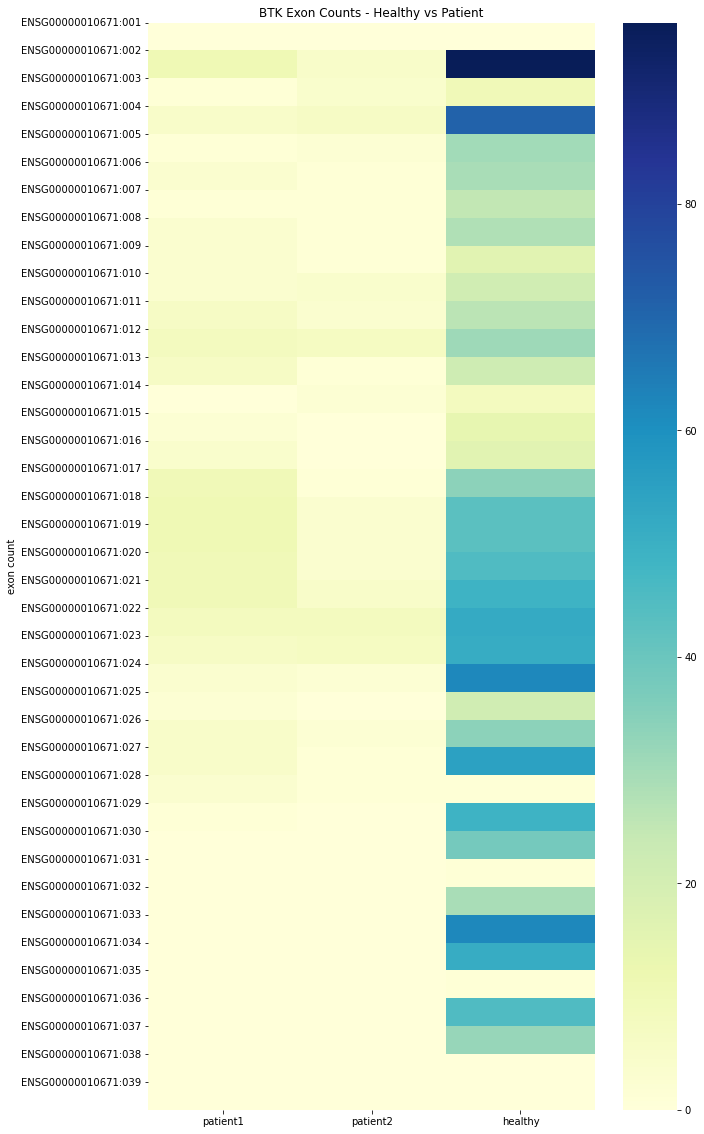

In [21]:
plt.figure(figsize=(10, 20))  # Set the figure siz
ax=sns.heatmap(count_table, cmap="YlGnBu")
plt.title('BTK Exon Counts - Healthy vs Patient')
# set sub title
# plt.suptitle('DEXSeq results', fontsize=10)
# display all exons in y axis
ax.set_yticks(range(len(count_table)))
ax.set_yticklabels(count_table.index)

